In [59]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


In [60]:
img_array= cv2.imread("C:/Users/hp/Downloads/Train_dataset/Train_dataset/closed_eye/s0013_00303_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)


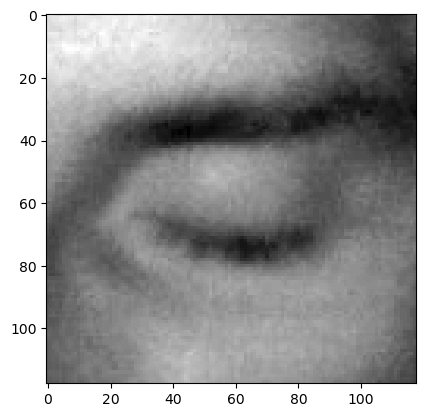

In [61]:
plt.imshow(img_array, cmap="gray")
plt.show()

In [62]:
img_array.shape

(118, 118)

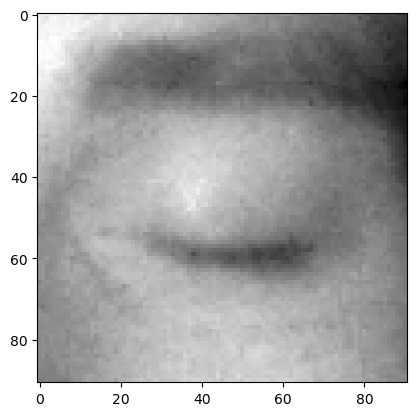

In [63]:
Datadirectory= ("C:/Users/hp/Downloads/Train_dataset/Train_dataset")
Classes= ["closed_eye","open_eye"]
for category in Classes:
    path=os.path.join(Datadirectory, category)
    for img in os .listdir(path):
        image_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(image_array, cmap="gray")
        plt.show()
        break
    break
    
    

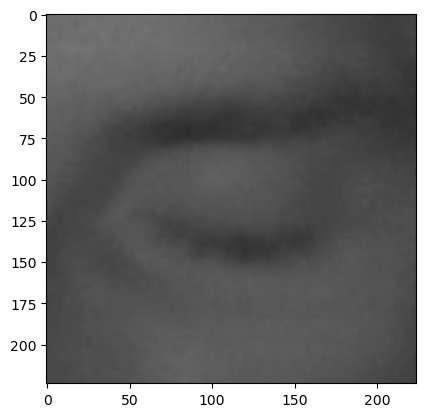

In [6]:
img_size=224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [69]:
training_Data= []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [65]:
create_training_Data()

In [66]:
print(len(training_Data))

1254


In [67]:
print(f"Total training data: {len(training_Data)}")

Total training data: 1254


In [68]:
import random
random.shuffle(training_Data)


In [12]:
X=[]
y= []

for features, label in training_Data:
    X.append(features)
    y.append(label)
X= np.array(X).reshape(-1,img_size, img_size , 3)

In [13]:
X.shape

(1254, 224, 224, 3)

In [14]:
#normalizing the data
X=X/255.0 

In [15]:
Y= np.array(y)

In [16]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in= open("y.pickle","rb")
y=pickle.load(pickle_in)

In [18]:
#deep learning model for training

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

In [21]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [22]:
#transfer learning

In [23]:
base_input = model.layers[1].input

In [24]:
base_output = model.layers[-4].output

In [25]:
Flat_layer =  layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) #One node(1/0 )
final_output = layers.Activation('sigmoid')(final_output)

In [26]:
new_model = keras.Model(inputs=base_input , outputs = final_output)

In [27]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [28]:
#setting for binary classification

In [29]:
new_model.compile(loss="binary_crossentropy",optimizer= "adam", metrics = ["accuracy"])

In [30]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9502 - loss: 0.1672 - val_accuracy: 0.9603 - val_loss: 0.3576


In [31]:
print(X.shape)
print(Y.shape)

(1254, 224, 224, 3)
(1254,)


In [32]:
new_model.save('my_model.keras')

In [33]:
#new_model = tf.keras.models.load_model('haarcascade_frontalface_default.h5')

In [34]:
#checking the network for predictions

In [35]:
img_array= cv2.imread("C:/Users/hp/Downloads/test image3.jpeg",cv2.IMREAD_GRAYSCALE)
backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size)) 

In [36]:
X_input = np.array(new_array).reshape(1,img_size,img_size, 3)

In [37]:
X_input.shape

(1, 224, 224, 3)

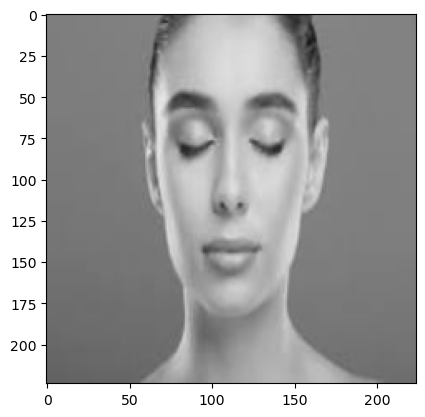

In [38]:
plt.imshow(new_array)

In [39]:
X_input=X_input/255.0

In [40]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [41]:
prediction

array([[0.9823292]], dtype=float32)

In [42]:
#lets check on unknown images

In [43]:
img= cv2.imread("C:/Users/hp/Downloads/img1.png")

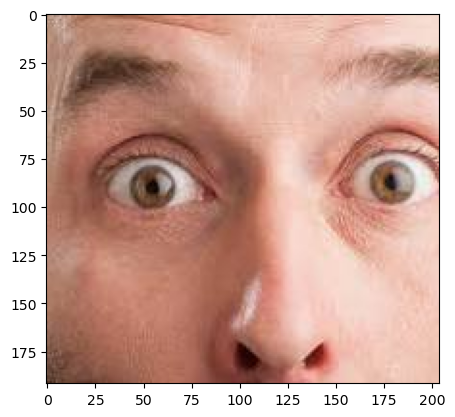

In [44]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [45]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [46]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [48]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [49]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

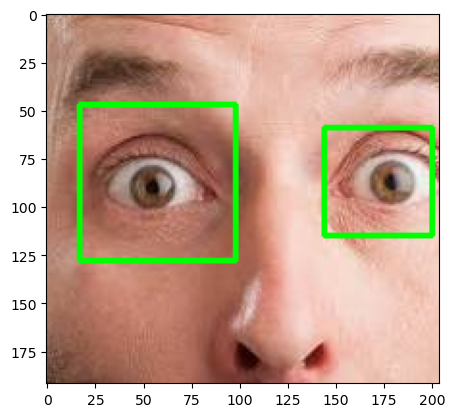

In [50]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Number of eyes detected: 2
Number of eyes detected in ROI: 1
Eyes detected, displaying the image.


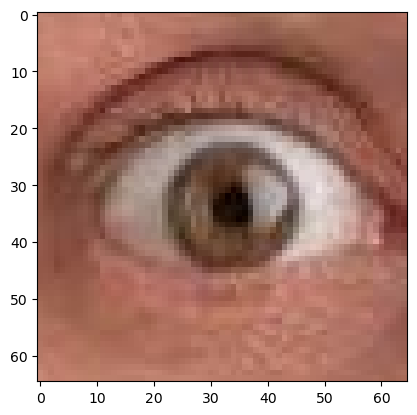

In [51]:
#cropping the eye
import cv2
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
print(f"Number of eyes detected: {len(eyes)}")
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    # Check for eye detection within the region of interest
    eyess = eye_cascade.detectMultiScale(roi_gray)
    print(f"Number of eyes detected in ROI: {len(eyess)}")
    
    if len(eyess) == 0:
        print("Eyes are not detected in the ROI")
    else:
        for ex, ey, ew, eh in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
            break  # Exit after finding the first eye
    break  # Exit after processing the first detected region

# Ensure that eyes_roi is not None and not empty before trying to display it
if eyes_roi is not None and eyes_roi.size > 0:
    print("Eyes detected, displaying the image.")
    plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("No valid eyes ROI found, so nothing to display.")



In [52]:
eyes_roi.shape

(65, 65, 3)

In [53]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [54]:
final_image.shape

(1, 224, 224, 3)

In [55]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[0.9991178]], dtype=float32)

In [56]:
#Realtime video Demo
#first detect that eyes are closed or open

In [57]:
#if eyes are closed for unsualtime, like morethan blinks, for few seconds, alarm generator

In [89]:
import winsound
import numpy as np
import cv2

frequency = 2500  # Frequency of the alarm sound
duration = 2000   # Duration of the alarm sound in milliseconds

# Load the face and eye cascade classifiers
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Initialize variables
counter = 0
max_counter = 10  # Number of frames with closed eyes before triggering the alarm

# Start video capture
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

    eyes_roi = None
    for (x, y, w, h) in eyes:
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyes_roi = roi_color
        break  # Only use the first detected eye region

    # If no eyes are detected, skip the rest of the loop
    if eyes_roi is None:
        counter += 1
        status = "Closed Eyes"
        cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_4)
        # Trigger alarm if the counter exceeds the threshold
        if counter > max_counter:
            x1, y1, w1, h1 = 0, 0, 175, 75
            cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1), (0, 0, 0), -1)
            cv2.putText(frame, 'Sleep Alert !!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            winsound.Beep(frequency, duration)
            counter = 0  # Reset counter after alarming
    else:
        # Reset counter if eyes are detected
        counter = 0
        status = "Open Eyes"
        cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_4)

    # Display the frame
    cv2.imshow("Drowsiness Detection", frame)

    # Break the loop if 'd' key is pressed
    if cv2.waitKey(2) & 0xFF == ord('d'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()
